# Introduction

In [1]:
import libcarna
import matplotlib.pyplot as plt

## Meshes

Using polygonal geometries is useful, for example, to create *markers* or to generally enrich visualizations. In 3D
graphics, *meshes* are used to define polygonal geometries. We start with the definition of a mesh for a *cube*:

In [2]:
cube = libcarna.meshes.create_box(40, 40, 40)

The size of the cube is given in *scene units* (SU), and here it is 40 SU in width, height, and depth. Scene units can
be anything that we agree them to be, like micrometers (e.g., for visualization of cellular image data) or millimeters
(e.g., for image data from computer tomography). It is only important that they are used consistently.

Next, we define some *materials*:

In [3]:
green = libcarna.material('solid', color=libcarna.color.GREEN)
red   = libcarna.material('solid', color=libcarna.color.RED  )

Materials determine how meshes (i.e. polygonal gemetries) are rendered. In LibCarna, a material consists of a *shader*
and a set of *parameters* like colors. Supported shaders comprise `solid` for materials whose colors are affected by
light (the default), and `unshaded` for materials that are colored uniformly.

## Scenes

Now that we have a mesh and some materials in place, we can create a *scene* that defines some spatial relations. We
create two spatial `geometry` objects, both using the `cube` mesh, but with different colors:

In [4]:
GEOMETRY_TYPE_OPAQUE = 1

root = libcarna.node()

libcarna.geometry(
    GEOMETRY_TYPE_OPAQUE,
    parent=root,
    features={
        libcarna.mesh_renderer.ROLE_DEFAULT_MESH: cube,
        libcarna.mesh_renderer.ROLE_DEFAULT_MATERIAL: green,
    },
).translate(-10, -10, -40)

libcarna.geometry(
    GEOMETRY_TYPE_OPAQUE,
    parent=root,
    features={
        libcarna.mesh_renderer.ROLE_DEFAULT_MESH: cube,
        libcarna.mesh_renderer.ROLE_DEFAULT_MATERIAL: red,
    },
).translate(+10, +10, +40)

<libcarna._spatial.geometry.<locals>.Geometry at 0x798f2487ac30>

*Scenes* are defined hierarchically, so they form a tree-like structure. The local coordinate system of a node always
is defined with respect to the coordinate system of its parent node. In this example, the green cube is moved by -10 SU
along the x- and y-axes, and by -40 SU along the z-axis. The red cube is moved in the opposite direction.

Note on `GEOMETRY_TYPE_OPAQUE`: A *geometry type* is an arbitrary integer constant, that establishes a relation between
the `geometry` nodes of a scene, and the corresponding rendering stages (see [below](#Rendering)).

Finally, we define a `camera` that will serve as the point of view for scene rendering:

In [5]:
camera = (
    libcarna.camera(parent=root)
    .frustum(fov=90, z_near=1, z_far=1000)
    .translate(0, 0, 250)
)

The `frustum` method defines the projection from 3D to planar coordinates. The `fov` argument defines the *field of
view* of the camera in degrees. The `z_near` and `z_far` arguments define the distance of the *near and far clipping
planes* to the camera; geometries, that are closer than 1 SU or farther than 1000 SU, will not be rendered.

## Rendering

Now we are all set to perform the rendering — almost! One ingredient is missing: The *renderer*. We only have *opaque*
geometries involved, so we set up the rendering pipeline accordingly:

In [6]:
opaque = libcarna.opaque_renderer(GEOMETRY_TYPE_OPAQUE)
r = libcarna.renderer(500, 370, [opaque])

Each renderer can have an arbitrary number of *rendering stages*. Here, we only use the `opaque` rendering stage to
render all geometries in the scene that we have annotated with the `GEOMETRY_TYPE_OPAQUE` as the geometry type.

And then it's time to render. We can inspect the result with matplotlib, for example:

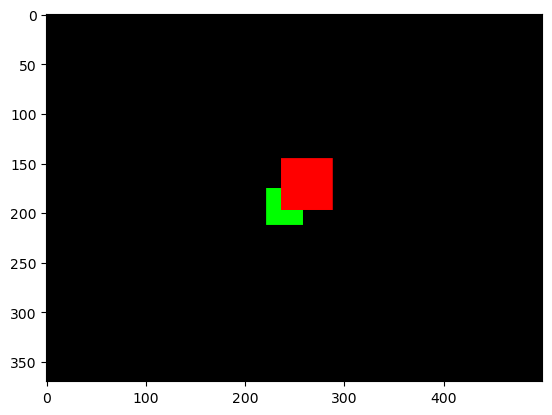

In [7]:
img = r.render(camera)
plt.imshow(img)

## Animations

It is much easier to visually grasp the information in a 3D scene by looking at it from different angles. For this
reason, there is a set of convenience functions that fascilitates creating animations, by rendering multiple frames at
once:

In [8]:
# Define animation
animation = libcarna.animate(
    libcarna.animate.rotate_local(camera),
    n_frames=50,
)

# Render and show animation
libcarna.imshow(animation.render(r, camera))

In this example, the camera is rotated around the *center of the scene* (more precisely: around it's parent node, that
happens to be the ``root`` node of the scene). The scene is rendered from 50 different angles. For each angle, the
result is a NumPy array.

Use `libcarna.imshow` to view animations, matplotlib does not work nicely.